In [4]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-08-08 11:26:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2021-08-08 11:26:30 (204 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

In [3]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [6]:
print(len(sentences))
print(len(labels))
print(sentences[0])
print(labels[0])

26709
26709
former versace store clerk sues over secret 'black code' for minority shoppers
0


In [88]:
vocab_size = 5000
embedding_dim = 32
max_length = 750
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [89]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [90]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [91]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [92]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [93]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [95]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 750, 32)           160000    
_________________________________________________________________
global_average_pooling1d_7 ( (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 160,817
Trainable params: 160,817
Non-trainable params: 0
_________________________________________________________________


In [97]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6853 - accuracy: 0.5603 - val_loss: 0.6848 - val_accuracy: 0.5633
Epoch 2/30
625/625 - 3s - loss: 0.6739 - accuracy: 0.5689 - val_loss: 0.6475 - val_accuracy: 0.5645
Epoch 3/30
625/625 - 3s - loss: 0.5575 - accuracy: 0.7335 - val_loss: 0.4735 - val_accuracy: 0.7980
Epoch 4/30
625/625 - 3s - loss: 0.4187 - accuracy: 0.8201 - val_loss: 0.4083 - val_accuracy: 0.8241
Epoch 5/30
625/625 - 3s - loss: 0.3650 - accuracy: 0.8460 - val_loss: 0.3847 - val_accuracy: 0.8372
Epoch 6/30
625/625 - 3s - loss: 0.3352 - accuracy: 0.8604 - val_loss: 0.3821 - val_accuracy: 0.8293
Epoch 7/30
625/625 - 3s - loss: 0.3162 - accuracy: 0.8685 - val_loss: 0.3890 - val_accuracy: 0.8259
Epoch 8/30
625/625 - 3s - loss: 0.2979 - accuracy: 0.8758 - val_loss: 0.3700 - val_accuracy: 0.8377
Epoch 9/30
625/625 - 3s - loss: 0.2854 - accuracy: 0.8799 - val_loss: 0.3614 - val_accuracy: 0.8442
Epoch 10/30
625/625 - 3s - loss: 0.2719 - accuracy: 0.8885 - val_loss: 0.3574 - val_accuracy: 0.8495

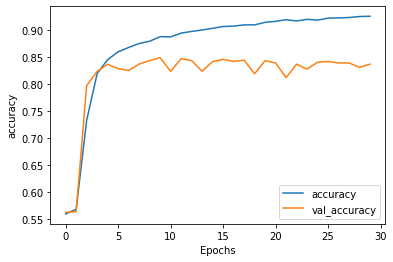

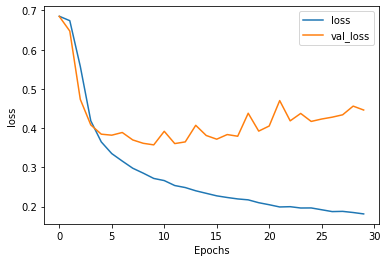

In [98]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [99]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? 

In [100]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(5000, 32)


In [101]:
import io

out_v = io.open('vecs_sarcasm.tsv', 'w', encoding='utf-8')
out_m = io.open('meta_sarcasm.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [102]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.80643547]
 [0.05376033]]
